# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

**Business Context**

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


**Objective**

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

Do the users spend more time on the new landing page than on the existing landing page?
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Does the converted status depend on the preferred language?
Is the time spent on the new page the same for the different language users?

Data Dictionary
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

user_id - Unique user ID of the person visiting the website

group - Whether the user belongs to the first group (control) or the second group (treatment)

landing_page - Whether the landing page is new or old

time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

converted - Whether the user gets converted to a subscriber of the news portal or not

language_preferred - Language chosen by the user to view the landing page


## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [2]:
#Importing Data from Local System
from google.colab import files
uploaded = files.upload()

Saving abtest.csv to abtest.csv


In [3]:
#to read the dataset
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [4]:
# view the first 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
# view the last 5 rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [6]:
# Check the shape of the dataset
df.shape

(100, 6)

# Observations:
There are 100 rows and 6 columns in the dataset.

In [7]:
# check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


# Observations:
There are three datatypes : one int64 , four object and one float64.

The integer type is User_id ;

The object are group, landing_page, convertedm and language_preffered ;

The float64 is time_spent_on_the_page


# Getting the statistical summary for the variables

In [8]:
# To get the numerical statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


# Observations:
   
*   The mean time is about 5.38 min and its standard deviation is 2.38 min. The time spent on the page ranges from the minimum time 0.19 minutes and the maximum time 10.71 minutes.

*   The 50% users spent 5.42 min on the page
*   There are 100 users.



In [9]:
# to get the statistical summary for the categorical variables
df.describe(include = 'object').T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,old,50
converted,100,2,yes,54
language_preferred,100,3,Spanish,34


In [10]:
# count of the unique values for the group variable
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

# Observation

There are 100 entries in this variable with 2 unique values - control and treatment.

In [11]:
# count of the unique values for the landing_page variable
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

In [12]:
# count of the unique values for the converted variable
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

# Observation

There are 100 entries in this variable with 2 unique values - yes and no .

In [13]:
# count of the unique values for the language preferred variable
df['language_preferred'].value_counts()


Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

# Observation

There are 100 entries in this variable with 3 unique values - Spanish , French and English.

In [14]:
#Check for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

# Observation

There are no missing values in the data.

In [15]:
#Check for duplicates
df.duplicated().sum()

0

# Observation

There are no duplicated value in the data.

### Univariate Analysis

Time spent on the page

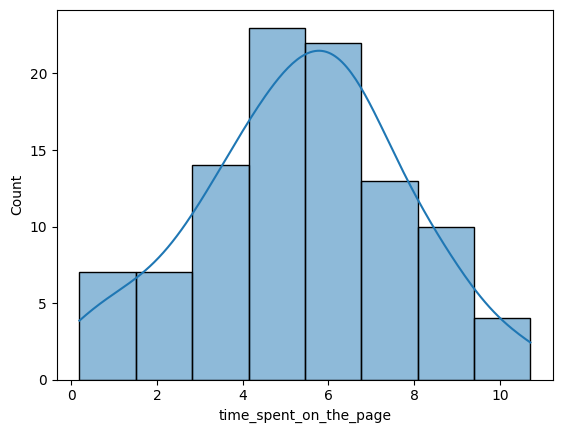

In [16]:
# To plot the distribution of Time spent on the page on the landing page
sns.histplot(data=df,x='time_spent_on_the_page',kde=True)
plt.show()


# Observation
The time spent on the page is normally distributed and has no outliers.

Group

In [17]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

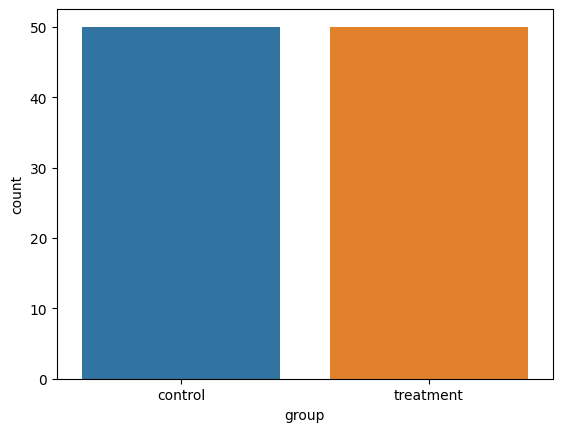

In [18]:
sns.countplot(data=df,x='group')
plt.show()

# Observation
The sample is evenly distributed into 'control' and 'treatment' group.

Landing page

In [19]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

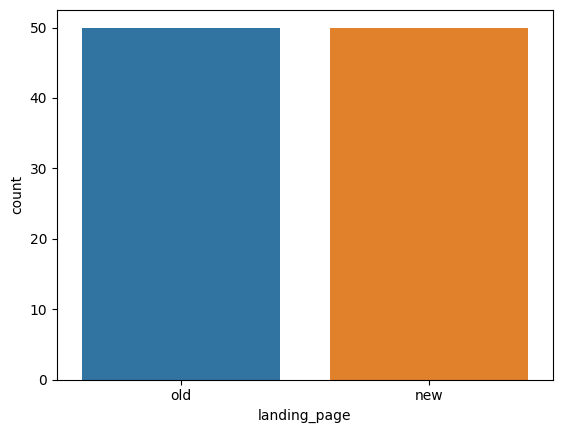

In [20]:
# to plot the countplot of Landing page
sns.countplot(data=df,x='landing_page')
plt.show()

# Observation
The sample is evenly distributed into 'old' and 'new' landing page.

# Converted

In [21]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

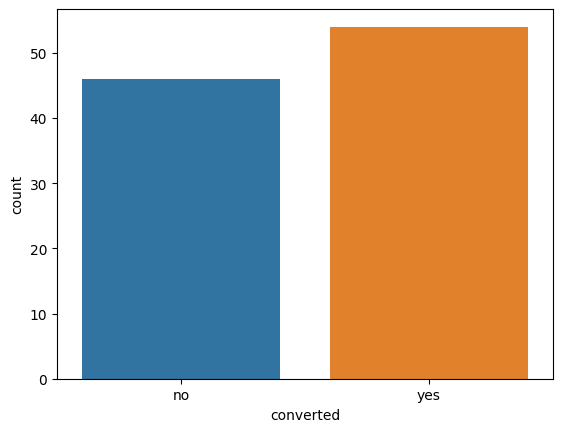

In [22]:
# To plot the distribution of the converted
sns.countplot(data=df,x='converted')
plt.show()

# Observations:
More users (54) who get converted on the new landing page than that of the the number of user who did not (46).

#### Language preferred

In [23]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

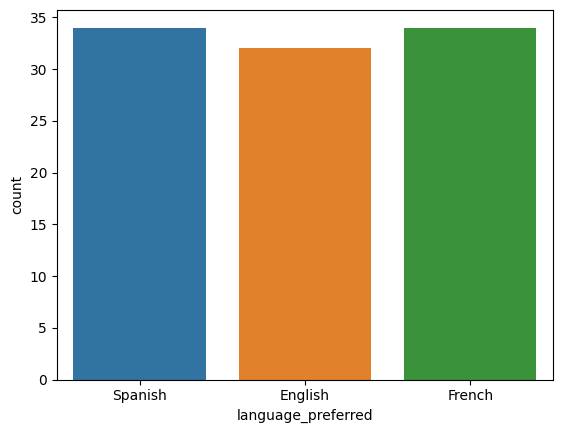

In [24]:
# complete the code to plot the countplot
sns.countplot(data=df,x='language_preferred')
plt.show()

# Observation:
There are three unique preferred languages - Spanish , English and French.


Both Spanish and French are the most preferred language (34 each)

English is the least preferred (32).


### Bivariate Analysis

# Landing page vs Time spent on the page

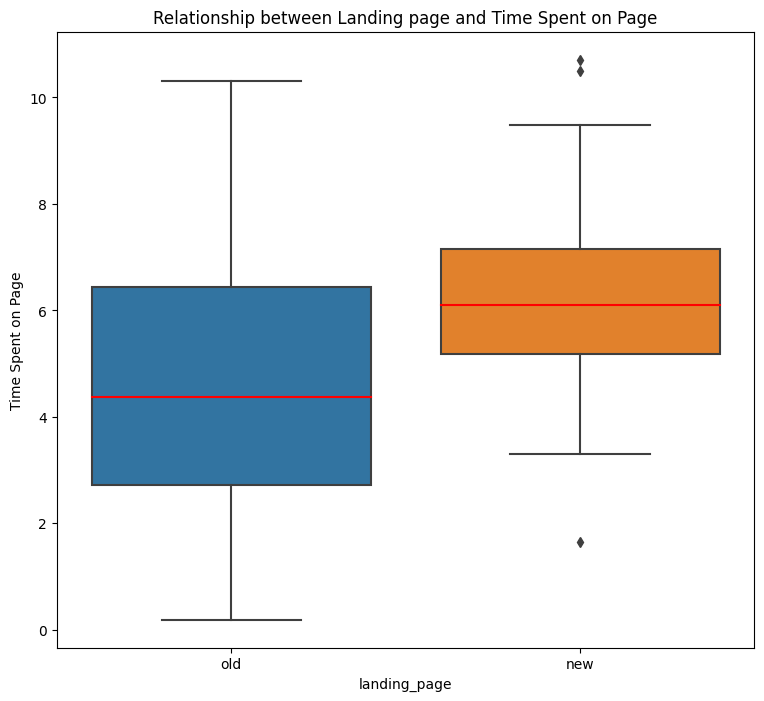

In [25]:
# Plot the boxplot
plt.figure(figsize=(9, 8))
ax = sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page', medianprops={'color': 'red'})
plt.xlabel('landing_page')
plt.ylabel('Time Spent on Page')
plt.title('Relationship between Landing page and Time Spent on Page')

plt.show()

In [26]:
df.groupby(['landing_page'])['time_spent_on_the_page'].median()

landing_page
new    6.105
old    4.380
Name: time_spent_on_the_page, dtype: float64

# Observation :
User spend more time on the new landing page than that of the old landing page.

# Conversion status vs Time spent on the page

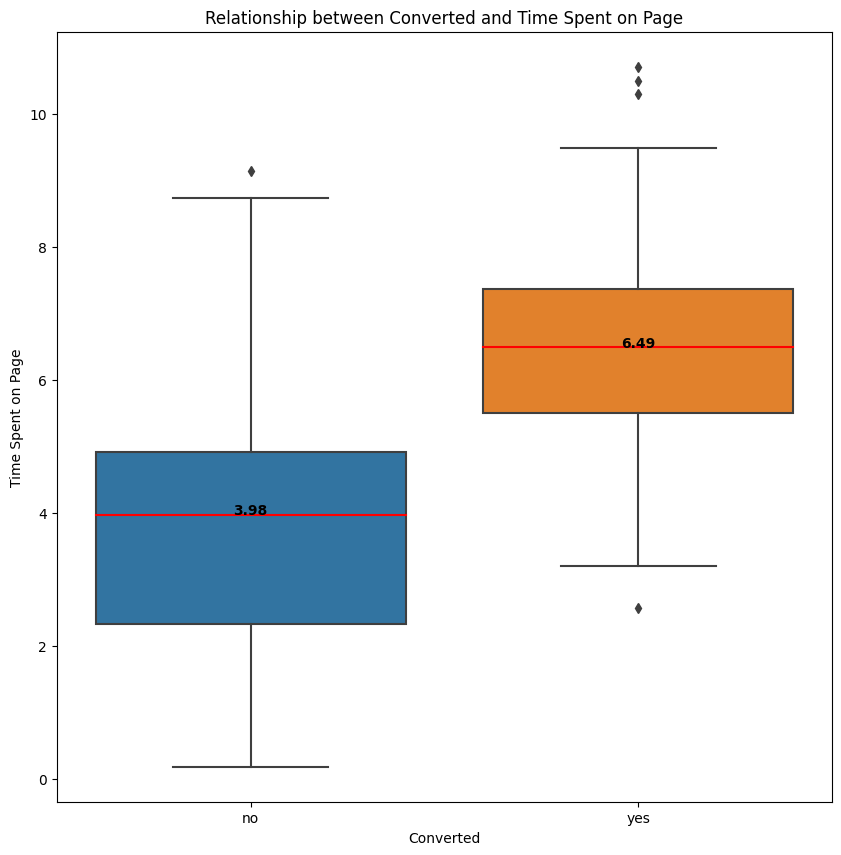

In [27]:
# Plot the boxplot
plt.figure(figsize=(10, 10))
ax = sns.boxplot(data=df, x='converted', y='time_spent_on_the_page', medianprops={'color': 'red'})
plt.xlabel('Converted')
plt.ylabel('Time Spent on Page')
plt.title('Relationship between Converted and Time Spent on Page')

# Annotate median values
medians = df.groupby('converted')['time_spent_on_the_page'].median()
positions = range(len(medians))
for pos, median in zip(positions, medians):
    ax.text(pos, median, f'{median:.2f}', horizontalalignment='center', color='black', weight='bold')

plt.show()


# Observations:
For those users converted to a subscriber of the news portal spent more time (6.49 min) on the page in term of median time.

Language preferred vs Time spent on the page

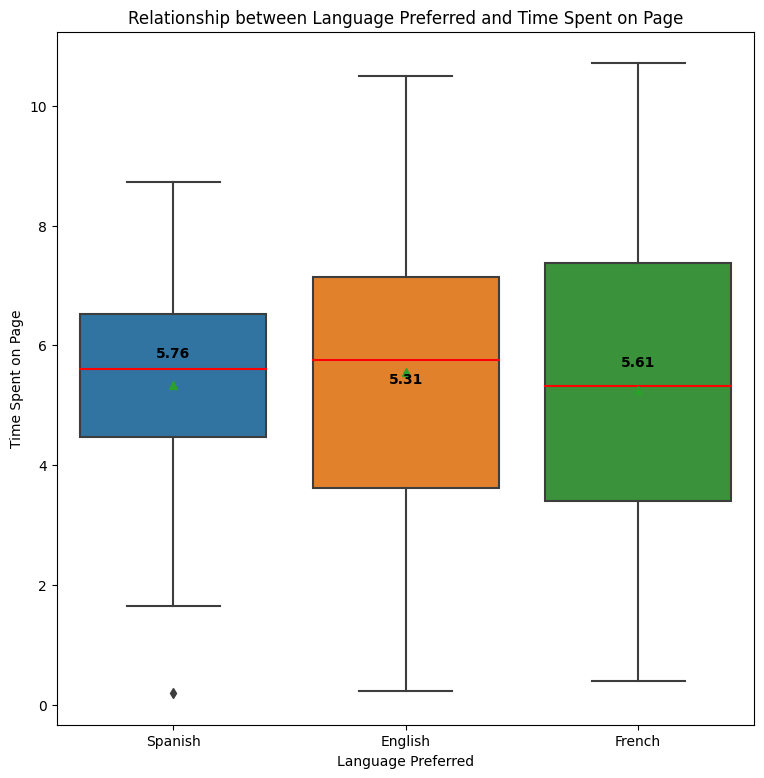

In [28]:
# Plot the boxplot to show the distribution of Language preferred vs Time spent on the page

plt.figure(figsize=(9, 9))
ax = sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=df, medianprops={'color': 'red'}, showmeans=True)
plt.xlabel('Language Preferred')
plt.ylabel('Time Spent on Page')
plt.title('Relationship between Language Preferred and Time Spent on Page')
# Annotate median values
medians = df.groupby('language_preferred')['time_spent_on_the_page'].median()
positions = range(len(medians))
for pos, median in zip(positions, medians):
    ax.text(pos, median, f'{median:.2f}', ha='center', va='bottom', color='black', weight='bold')
plt.show()


# Observation:
The median time spent on the page appears is similar for the three preferred languages.

Users preferred Spanish have the least max. time spent on the page compared to other two languages preferred users. Also, there is an outlier on the spanish language preferred.


## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

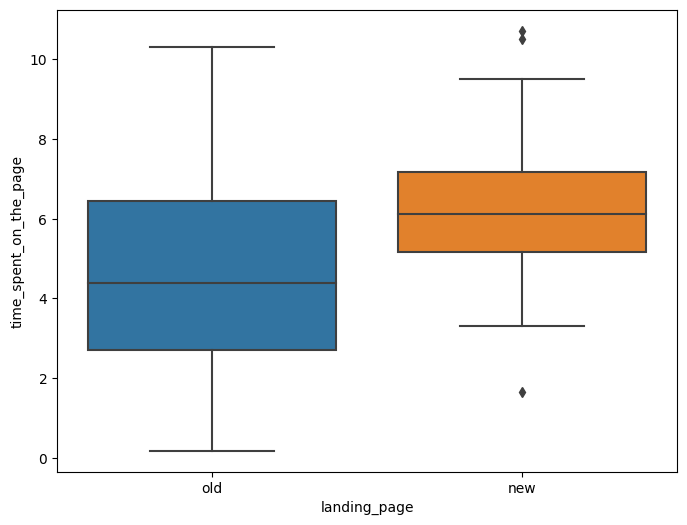

In [29]:
# to visualize analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

# Observation:
Users on average spend more time on the new page than that of the old page. There are a few outliers on the boxplot of the new landing page.

### Step 1: Define the null and alternate hypotheses

𝐻0 : The mean time of the users spent time on the new landing page is equal to that of the existing landing page(the old page).

𝐻𝑎 : The mean time of the users spent time on the new landing page is more that of the existing landing page(the old page).


Let μ1 and μ2 be the mean time spent on the old landing page vs the mean time spent on the new landing page.

Mathematically, the above formulated hypotheses can be written as:

H0:μ1=μ2

Ha:μ1>μ2


### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. Based on this information, a two-sample independent t-test is the most appropriate test.

### Step 3: Decide the significance level

 𝛼=0.05 is selected as it is stated in the problem statement.

### Step 4: Collect and prepare data

In [30]:
# create subsetted data frame for new landing page users
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [31]:
print('The sample standard deviation of the time spent on the new page :', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page :', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page : 1.82
The sample standard deviation of the time spent on the new page : 2.58


# Observation
Because of the sample standard deviations of the two groups is different, therefore the population standard deviations is assumed to be different.

### Step 5: Calculate the p-value

In [32]:
# import the required function
from scipy.stats import ttest_ind

In [33]:
# calculate the p-value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [34]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

# Conclusion
Since the p-value is less than the 5% significance level, the null hypothesis is rejected.

Hence, we have enough statistical evidence to say that the mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

# Perform Visual Analysis

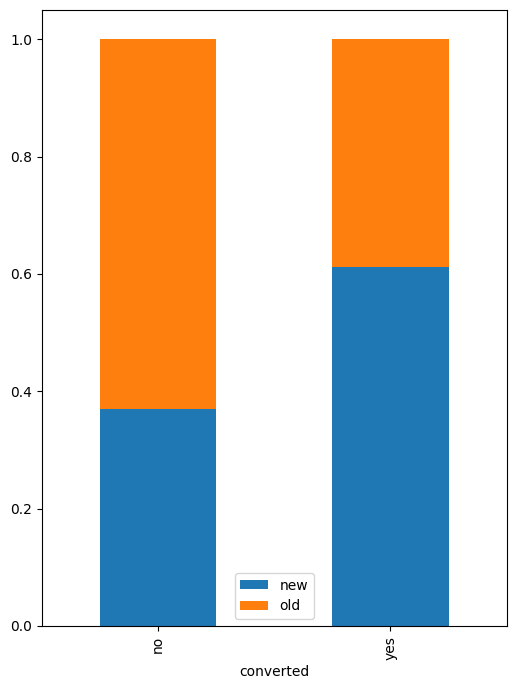

In [35]:
# to visualize the analysis of the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['converted'],df['landing_page'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

# Observations:
It shows that more users on the new landing page are more likely to be converted to subscribers than users on the old landing page.

Step 1: Define the null and alternate hypotheses

𝐻0 : The conversion rate of the new landing page is equal to that of the existing landing page(the old page).

𝐻𝑎 : The conversion rate of the new landing page is greater that of the existing landing page(the old page).



> $H_0:$ The conversion rate for the new landing page is equal to the conversion rate for the old landing page. <br>

> $H_a:$ The conversion rate for the new landin gpage is greater than the conversion rate for the old landing page.

Let $p_1$ and $p_2$ be the conversion rate for the new and old landing page respectively.

Mathematically, the above formulated hypotheses can be written as:

> $H_0: p_1 = p_2 \\
H_a: p_1 > p_2$

Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. Based on this information, a two-sample independent z-test is the most appropriate test.

Step 3: Decide the significance level


𝛼=0.05 is selected as it is stated in the problem statement.

Step 4: Collect and prepare data

In [36]:
# to calculate the number of converted users in the treatment and control groups
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']

In [37]:
# total number of users in the control group
number_control = df.group.value_counts()['control']

In [38]:
# total number of users in the treatment group
number_treatment = df.group.value_counts()['treatment']

In [39]:
print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(number_control, number_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


Step 5: Calculate the p-value

In [40]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest

# calculate the p-value
test_stat, p_value =  proportions_ztest ([new_converted, old_converted] , [number_treatment, number_control], alternative = 'larger')
print('The p-value is ', p_value)

The p-value is  0.008026308204056278


Step 6: Compare the p-value with  𝛼

In [41]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


# Step 7: Draw inference

Conclusion
Since the pvalue is less than the level of significance 5% , the null hypothesis is rejected.

Hence, we have enough statistical evidence to say that the conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page.



## 3. Is the conversion and preferred language are independent or related?

# Perform Visual Analysis

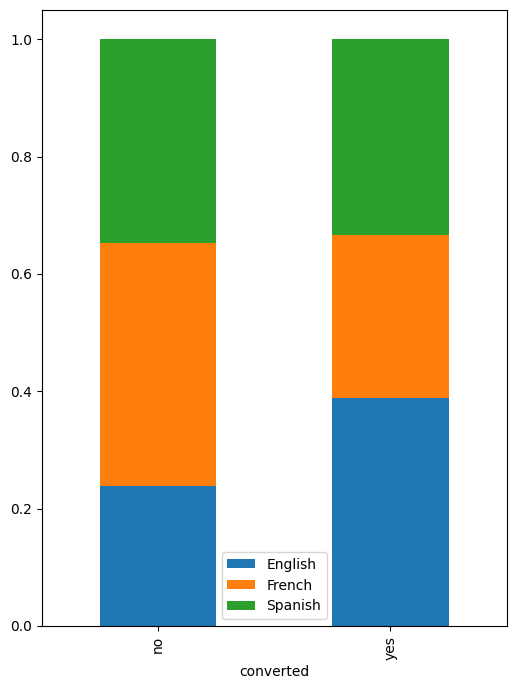

In [42]:
#To visualize the anaylsis of conversion rate and preferred langauge
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()


It shows that the distribution of conversion status for users who prefer english and french is not fairly distributed.


# Step 1: Define the null and alternative hypotheses

𝐻0: The converted status is independent of the preferred language.


𝐻𝑎: The converted status is not independent of the preferred language.

# Step 2: Select Appropriate test

The formulated hypotheses can be tested using a Chi-square test of independence of attributes, concerning the two categorical variables (the converted status and preferred language).



# Step 3: Decide the significance level

𝛼=0.05 is selected as it is stated in the problem statement.

# Step 4: Collect and prepare data

In [43]:
# create the contingency table to perform the Chi-squared test of independance

contingency_table = pd.crosstab(df['converted'], df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


We have created a two-by-two contingency table, with the counts of 'conversion status' (Yes or No) in the rows and the counts of 'language preferred' (English, French , Spanish) in the columns.

# Step 5: Calculate the p-value

In [44]:
# import the required function
from scipy.stats import chi2_contingency

# find out the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)

print('The p-value is', p_value)

The p-value is 0.21298887487543447


# Step 6: Compare the p-value with  𝛼

In [45]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


# Step 7: Draw inference

Conclusion

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that the converted status depends on the preferred language.

## 4. Is the time spent on the new page same for the different language users?

# Perform Visual Analysis




In [46]:
# create a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

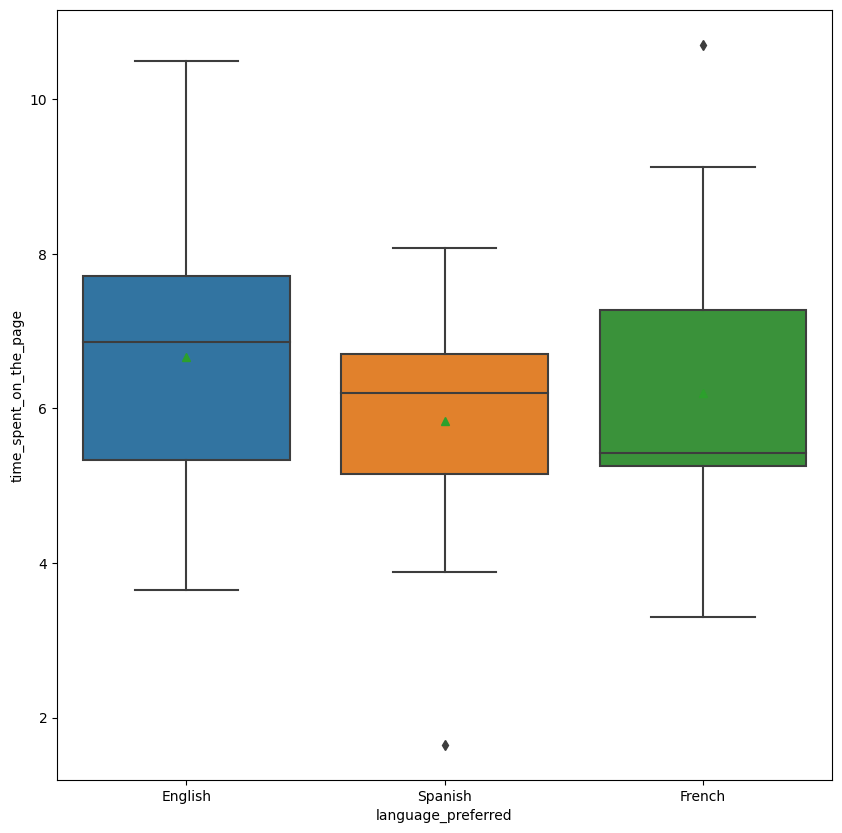

In [47]:
#To visualize the analysis of time spent on the new page same for the different language users
plt.figure(figsize=(10,10))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()

In [48]:
#to calculate the mean time that was spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

# Obervation :

The mean time spent on the new page for Spanish users is less than that of French and English.

# Step 1: Define the null and alternate hypotheses

𝐻0: The mean time spent on the new lading page is the equal to all preferred langauges.

𝐻𝑎: At least one of the mean times spent on the new landing page is unequal amongst the preferred languages.

# Step 2: Select Appropriate test

This is a problem concerning three population means. One-way ANOVA is an appropriate test here provided normality and equality of variance assumptions are verified.


One-way ANOVA test

In a one-way ANOVA test, we compare the means from several populations to test if there is any significance difference between them. The results from an ANOVA test are most reliable when the assumptions of normality and equality of variances are satisfied.

For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

For equality of variance, Levene test is applied to the response variable.

Shapiro-Wilk’s test

We will test the null hypothesis.

H0: The time spent on the new lading page follows a normal distribution

**against the alternative hypothesis**\
𝐻𝑎 : The time spent on the new lading page do not not follow a normal distribution

In [49]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test
from scipy.stats import shapiro

# find the p-value
w, p_value = shapiro(df_new['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

# Levene’s test

We will test the null hypothesis

H0 : All the population variances are equal

against the alternative hypothesis

H𝑎 : At least one variance is different from the rest

In [50]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test
from scipy.stats import levene

# create separate variables to the time spent on the page with respect to the three preferred languages
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']

statistic, p_value = levene(time_spent_English, time_spent_French, time_spent_Spanish)

print('p-value is ', p_value)


p-value is  0.46711357711340173


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

# Step 3: Decide the significance level

𝛼=0.05 is selected as it is stated in the problem statement.

# Step 4: Collect and prepare data

In [51]:
# create separate variables to the time spent on the page with respect to the three preferred languages
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']

# Step 5: Calculate the p-value

In [52]:
# use the f_oneway() function from the scipy.stats library to perform a one-way ANOVA test.
#The f_oneway() function takes the sample observations from the different groups and returns the test statistic and the p-value for the test.
#The sample observations are the values of the time spent on the page with respect to the three preferred languages

In [53]:
# import the required function
from scipy.stats import f_oneway

# find the p-value
f_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)

print('p-value is', p_value)


p-value is 0.43204138694325955



# Step 6: Compare the p-value with α

In [54]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


# Step 7: Draw inference

Since the p-value is greater than the level of significance 5%, we fail to reject the null hypothesis. Hence, we do not have enough statistical evidence to say that the mean time spent on the new landing page amongst the preferred language differs.



# Conclusion and Business Recommendations

From the analysis , the conclusion is drew -

1. The mean time spent by the users on the new page is greater than the mean time spent by the users on the old page. The new landing page is more likely to engage the users to read the content of the new page.  

2. The conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page. The new landing page is more likely to have customers converted.

3. The converted status is independent of the preferred language.

4. The time spent on the new page does not differ for the different language users.


Recommendations

The company should fully implement the new landing page to have higher conversion rate of the new subscribers based on the higher conversion rate on the new landing page. To engage the customers , the new landing page shows that the users spend more time on the new landing page , the company can put more resource on the new landing page design , content and improve user experience.


Since the preferred language does not show significant difference on the the mean time spent on the new page and the conversion rate to new subscribers. The company should change to use the new landing page incorporating all the exiting preferred languages. This will carry out similar conversation rate amongst the preferred language users.

